In [1]:
import h5py
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pyfftw as ft
import time
import pyJHTDB
from pyJHTDB.dbinfo import isotropic1024coarse
from pyJHTDB import libJHTDB

In [2]:
N = 1024

In [3]:
w2 = ft.zeros_aligned((N,N,N), dtype='float32')

In [4]:
wiz = (b'(fftw-3.3.4 fftw_wisdom #x41ad5c95 #x159437f1 #x23fdee71 #xc6cf4464\n)\n', b'(fftw-3.3.4 fftwf_wisdom #xa84d9475 #xdb220970 #x4aa6f1c4 #xf3163254\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x0478d9e6 #xffc458b2 #xefeba0c5 #xe8fb2e05)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xb6380734 #x8d827d8e #xdc067a28 #x4fc763de)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xe0177557 #xe9f32997 #xfb2dcb2c #xf8f70860)\n  (fftwf_dft_buffered_register 0 #x10bdd #x10bdd #x0 #x3eeb1978 #x428183dc #x2a84fbfa #xe4361ea0)\n  (fftwf_codelet_hc2cb_8 0 #x10bdd #x10bdd #x0 #x48259488 #x196c8c29 #x37f91b06 #x556264da)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb27d35ea #xa96ba975 #x4796bd74 #xae50e653)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x68ff47a8 #x21bb9e5b #xa20dc9bd #xd2485c0c)\n  (fftwf_codelet_r2cb_8 2 #x10bdd #x10bdd #x0 #x669a3813 #x9ba2bb21 #x64e8656d #x87c9de00)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x9c0e3f58 #x928ea026 #xd28229a3 #x7246e0ac)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #xee87b2d5 #x3e497607 #xfff1907f #xf9579a39)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x8676a7b7 #xe006c70d #x487b0278 #xb2f8f002)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb8bedcad #x45a4525b #xc44e4385 #xa637a3a4)\n  (fftwf_codelet_r2cf_8 2 #x11bdd #x11bdd #x0 #x675249aa #x037557b8 #x14643a4b #x9ea626ef)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x33c540f7 #x7207139c #x75ca3a4c #x748bc1b6)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf6843763 #xe67a42c5 #x37896514 #x1934a686)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x1e5fa302 #x4dca4b4b #x68854fe7 #x57f745da)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x129e3b9a #xbe5c8c09 #x84314e36 #x92c09d6d)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_codelet_r2cfII_8 2 #x11bdd #x11bdd #x0 #xc7a8d0be #x7798b669 #x9437b479 #x2ba791fc)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x2ca97a7c #x1278c07a #x4b274fea #x63afcfcd)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x2b2a182d #x1a4f0eb8 #x4051bfc8 #x50ede16d)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x09558463 #xdea41841 #xf014e84a #x343a12e5)\n  (fftwf_dft_buffered_register 0 #x11bdd #x11bdd #x0 #xf6040783 #x4ecac406 #x61d1e470 #xc372144f)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x37c7ab24 #x6b6a7433 #xbb43af76 #x9bd7720f)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xcd08c9cd #xac2dabe6 #x0a6d47c5 #x5b07814f)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xd84e4956 #xbbda597c #x4dcc8ca2 #x8135f48a)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #xb5f6482a #x970cff75 #xad1e3938 #x526a74d7)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x54bf9035 #xa469d859 #x8c3af79c #xaabf7edf)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xbf8f2281 #x53d808d5 #x34ab52eb #x747f8bf4)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #x4c6eda6a #xd64bb98a #xdeff4d47 #xbd9bc277)\n  (fftwf_rdft_rank0_register 2 #x11bdd #x11bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x914f085b #x7945eab1 #xb24b3509 #x41ff886a)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x7cf6cc98 #x1860681d #x04f92f92 #x64e3787b)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x2d58151a #x7bf279ac #xd05075c9 #x05025c02)\n  (fftwf_codelet_hc2cf_8 0 #x11bdd #x11bdd #x0 #xa3aa3245 #xfa89ad84 #x6f51d136 #x21269ea8)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #x6e3f6b00 #xc631065b #xc5ce0991 #xc9e5830a)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x245908be #x1b45c309 #xfa989829 #xe3448ecb)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xce1da3b2 #xb156b9ff #x345deb46 #x24967a68)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #xbf36f96d #xc5099024 #xab4588dd #x0f71c101)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xca4b9bb9 #x447b7ee5 #xbb98516b #x49ee082c)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x2fdf6c57 #xa3a423cb #x3c83b16e #xd62995da)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x938d7e18 #x1343c0de #xbe03a120 #x64e734a9)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #xee00c037 #x8d699089 #xad7ad6a0 #x4efaaf7d)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x1fe15182 #x5f3d421c #xba834eb6 #x2292df94)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbd6b8262 #xabd0b6b7 #xe6ad6d03 #x628df7dc)\n  (fftwf_rdft_rank0_register 2 #x10bdd #x10bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x32025de0 #x37ce7b0a #x95c084dd #xcd18ab21)\n  (fftwf_codelet_r2cb_128 0 #x10bdd #x10bdd #x0 #x673294cd #xe5b085a3 #xb8a774bf #xfd19dfb2)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x3c666628 #x01043fe7 #x20ba9e85 #x1f9b67a1)\n  (fftwf_codelet_r2cbIII_8 2 #x10bdd #x10bdd #x0 #xfb67696a #x19d836b7 #x6b24c329 #xe4fc2e8b)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x38a08196 #x2a4ca72e #x2d1ba440 #x10600d8c)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x1913d4ac #xf2d50866 #xc504d3dd #x76d5edcd)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x411f7a68 #x161cf1d6 #xbec2d98e #x7d9fdffa)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x89cb22ca #x6491b1a8 #xf5f7b0be #x3cd19d43)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x519e2811 #xfd996521 #x222afcf1 #xa289f0a6)\n  (fftwf_codelet_r2cf_128 0 #x11bdd #x11bdd #x0 #x23eb177d #x111d2c06 #xa78f35fb #xd56dcd76)\n)\n', b'(fftw-3.3.4 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n')

In [5]:
ft.import_wisdom(wiz)

(True, True, True)

In [6]:
fo = ft.zeros_aligned((N,N,N), dtype='float32')
bo = ft.zeros_aligned((N,N,N//2+1), dtype='complex64')

In [7]:
start = time.time()

fft_object = ft.FFTW(fo,bo,axes=(0,1,2), direction='FFTW_FORWARD', flags=('FFTW_MEASURE', ),threads=8)
ifft_object = ft.FFTW(bo,fo,axes=(0,1,2), direction='FFTW_BACKWARD', flags=('FFTW_MEASURE', ),threads=8)

end = time.time()
print(end-start)

0.031132221221923828


In [8]:
start = time.time()

folder = '/home/idies/workspace/scratch'

nproc = 8
nx = N//nproc

lw2 = ft.zeros_aligned((N//nproc,N,N), dtype='float32')

folder = '/home/idies/workspace/scratch'

for k in range(nproc):
    filename = 'enstrophy-szalay-'+str(k)+'.npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    lw2[:,:,:] = content['w2']
    
    w2[k*nx:(k+1)*nx,:,:] = lw2[:,:,:]
    
end = time.time()
print(end-start)

KeyboardInterrupt: 

In [9]:
avgw2 = np.average(w2)
print("Average enstrophy: "+str(avgw2/2.))

Average enstrophy: 245.579956055


In [10]:
start = time.time()

chi = ft.zeros_aligned((N,N,N), dtype='float32')
cchi = ft.zeros_aligned((N,N,1+(N//2)), dtype='complex64')
corr = ft.zeros_aligned((N,N,N),dtype='float32')

end = time.time()
print(end-start)

7.99185037612915


In [11]:
minw2 = np.min(w2)
maxw2 = np.max(w2)
avgOmega = avgw2

print("0.5 <w^2> : "+str(avgOmega/2))
print("<w^2> : "+str(avgOmega))
print("min w2 : "+str(minw2))
print("max w2 : "+str(maxw2))
print("min w2/<w^2> : "+str(minw2/avgOmega))
print("min w2/<w^2> : "+str(maxw2/avgOmega))

0.5 <w^2> : 245.579956055
<w^2> : 491.16
min w2 : 9.39717e-06
max w2 : 258231.0
min w2/<w^2> : 1.91326e-08
min w2/<w^2> : 525.758


In [12]:
start = time.time()

t = 5
c = 'r'

chi[:,:,:] = 0
chi[w2 > t*avgOmega] = 1

Np = np.sum(chi)

chi[:,:,:] = chi[:,:,:]/np.sqrt(Np)

end = time.time()
print(end-start)

15.374666690826416


In [13]:
start = time.time()

fo[:,:,:] = chi[:,:,:]
fft_object.update_arrays(fo,bo)
fft_object.execute()
cchi[:,:,:] = bo[:,:,:]

tmp = cchi*(cchi.conj())
tmp[0,0,0] = 0.

bo[:,:,:] = tmp[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
corr[:,:,:] = fo[:,:,:]/(N**3)

end = time.time()
print(end-start)

75.37116622924805


In [14]:
print(corr[0,0,0])
print(corr[corr<0.])

0.965289
[ -1.05998479e-05  -5.78328036e-05  -1.46401115e-04 ...,  -1.59449177e-04
  -1.20769604e-04  -6.31480943e-05]


In [15]:
dx = isotropic1024coarse['dx']
ner = int(512*np.sqrt(3))
rbins = np.linspace(-0.5*dx,2*np.pi*np.sqrt(3)+0.5*dx,ner+1)

X  = np.zeros((N//2,N//2,N//2), dtype='float32')
Y  = np.zeros((N//2,N//2,N//2), dtype='float32')
Z  = np.zeros((N//2,N//2,N//2), dtype='float32')
r2 = np.zeros((N//2,N//2,N//2), dtype='float32')

iCorr = np.zeros((N//2,N//2,N//2), dtype='float32')

In [16]:
start = time.time()

for i in range(N//2):
    X[i,:,:] = (i+0.5)*isotropic1024coarse['dx']
    
for j in range(N//2):
    Y[:,j,:] = (j+0.5)*isotropic1024coarse['dy']
    
for k in range(N//2):
    Z[:,:,k] = (k+0.5)*isotropic1024coarse['dz']

r2[:,:,:] = X[:,:,:]**2+Y[:,:,:]**2+Z[:,:,:]**2
r2rt = np.sqrt(r2)

end = time.time()
print(end-start)

10.501919269561768


In [17]:
logrr = np.log(r2rt)

In [18]:
iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 

In [19]:
r2rtmin = np.min(logrr)
r2rtmax = np.max(logrr)
print(r2rtmin)
print(r2rtmax)

minlogrt = r2rtmin
maxlogrt = r2rtmax

-5.23744
1.69306


In [25]:
Nbins = 17
sc = (maxlogrt - minlogrt)/Nbins
bins = np.linspace(minlogrt,maxlogrt,num=Nbins,endpoint=True)

In [26]:
print(bins)

[-5.23743582 -4.80427989 -4.37112397 -3.93796805 -3.50481212 -3.0716562
 -2.63850027 -2.20534435 -1.77218843 -1.3390325  -0.90587658 -0.47272065
 -0.03956473  0.3935912   0.82674712  1.25990304  1.69305897]


In [27]:
start = time.time()

corrLoc,redges = np.histogram(logrr,range=(r2rtmin,r2rtmax)
                              ,bins = bins,weights=iCorr)
    
r2Loc,r2edges = np.histogram(logrr,range=(r2rtmin,r2rtmax)
                            ,bins = bins)

end = time.time()
print(end-start)

30.405824661254883


In [41]:
print(corrLoc)
print(corrLoc/r2Loc)

[  9.65288997e-01   1.91192114e+00   5.45314455e+00   1.02802448e+01
   2.27149658e+01   4.94339561e+01   1.23830505e+02   3.29390442e+02
   8.44548584e+02   2.07526196e+03   4.35683984e+03   7.04565527e+03
   4.50443457e+03  -1.20211387e+04   6.99328613e+02   1.81757051e+04]
[  9.65288997e-01   6.37307048e-01   4.19472658e-01   2.39075461e-01
   1.32063755e-01   8.15741851e-02   5.64662587e-02   4.05903194e-02
   2.85195213e-02   1.90537842e-02   1.09143923e-02   4.81283947e-03
   8.38915707e-04  -6.10530412e-04   1.04201471e-05   4.54020319e-04]


In [29]:
print(corrLoc.shape,redges.shape)
print(r2Loc.shape,r2edges.shape)

(16,) (17,)
(16,) (17,)


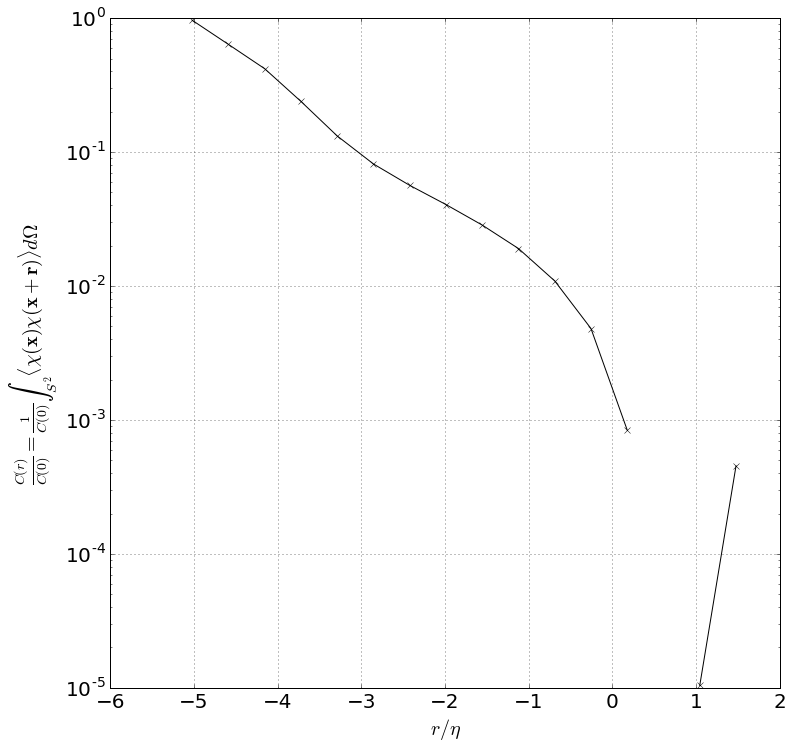

In [59]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.figure(figsize=(12,12))
plt.xlabel(r'$log(r)$', fontsize=20)
plt.ylabel(r'$\frac{C(r)}{C(0)} = \frac{1}{C(0)} \int_{S^2} \langle \chi({\bf x}) \chi({\bf x}+{\bf r}) \rangle d\Omega$', fontsize=20)

rbins = (redges[0:(Nbins-1)]+redges[1:Nbins])/2
fit = [-0.36067237,-3.30415286]
#plt.ylim(-5,1)
#plt.ylim(-5,1)

plt.grid()
plt.semilogy(rbins,corrLoc/r2Loc,'kx-')
#plt.semilogy(rbins,np.exp(fit[1]+fit[0]*rbins),'k--') #np.exp(fit[1]+12)*(rbins**(fit[0]+2)),'k--')

In [63]:
start = time.time()

tl = [5,10,25,50,75]
c  = ['r','g','b','m','c']

lcorr = []
llogr = []

for t in tl:
    start = time.time()
    
    chi[:,:,:] = 0
    chi[w2 > t*avgOmega] = 1
    
    Np = np.sum(chi)
    chi[:,:,:] = chi[:,:,:]/np.sqrt(Np)
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    tmp[0,0,0] = 0.
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(logrr,range=(r2rtmin,r2rtmax)
                                  ,bins = bins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(logrr,range=(r2rtmin,r2rtmax)
                                  ,bins = bins)
    
    lcorr.append(corrLoc)
    llogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

time : 116.41040301322937
time : 121.78662371635437
time : 123.61435222625732
time : 120.81317591667175
time : 120.4167685508728


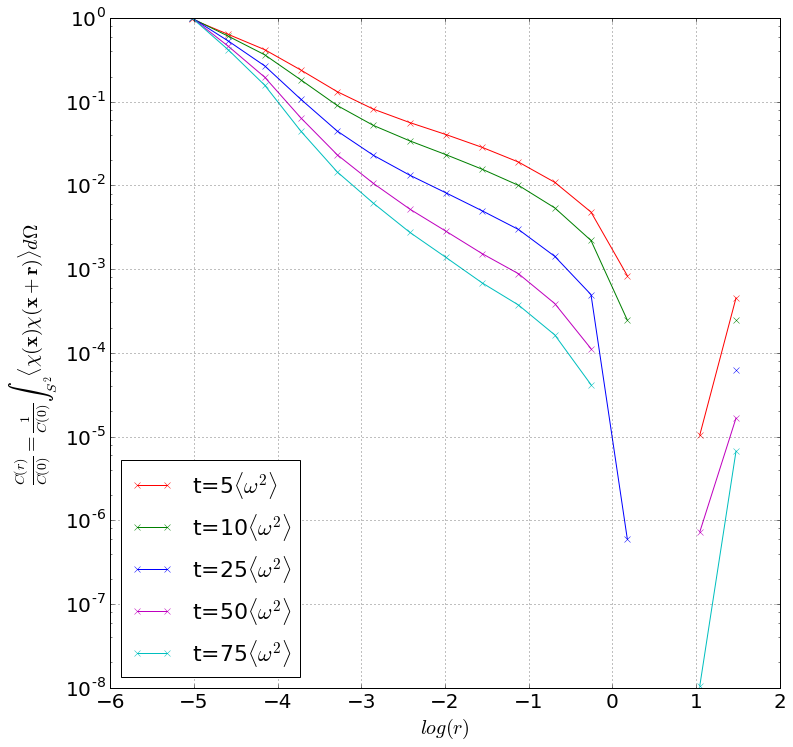

In [79]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.figure(figsize=(12,12))
plt.xlabel(r'$log(r)$', fontsize=20)
plt.ylabel(r'$\frac{C(r)}{C(0)} = \frac{1}{C(0)} \int_{S^2} \langle \chi({\bf x}) \chi({\bf x}+{\bf r}) \rangle d\Omega$', fontsize=20)

rbins = (redges[0:(Nbins-1)]+redges[1:Nbins])/2
fit = [-0.36067237,-3.30415286]

plt.grid()

for i in range(5):
    pcorr = lcorr[i]
    pr2 = llogr[i]
    plt.semilogy(rbins,pcorr/pr2,c[i]+'x-',label=r't='+str(tl[i])+r'$\langle\omega^2\rangle$')
    
plt.legend(loc='lower left',prop={'size':22})
plt.savefig("logbins-enstrophy-corr-1.pdf")

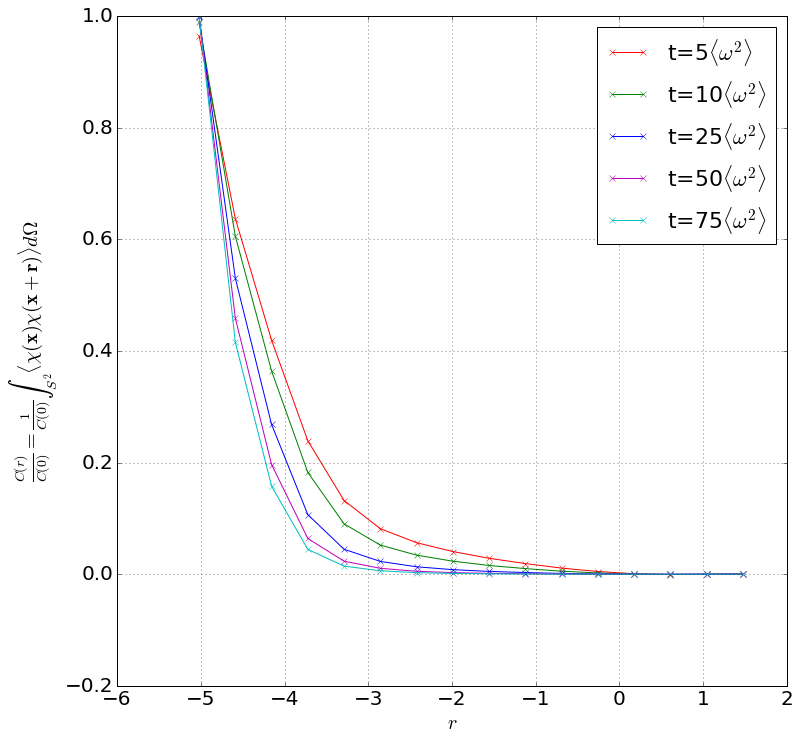

In [78]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.figure(figsize=(12,12))
plt.xlabel(r'$r$', fontsize=20)
plt.ylabel(r'$\frac{C(r)}{C(0)} = \frac{1}{C(0)} \int_{S^2} \langle \chi({\bf x}) \chi({\bf x}+{\bf r}) \rangle d\Omega$', fontsize=20)

rbins = (redges[0:(Nbins-1)]+redges[1:Nbins])/2
fit = [-0.36067237,-3.30415286]

plt.grid()

for i in range(5):
    pcorr = lcorr[i]
    pr2 = llogr[i]
    plt.plot(rbins,pcorr/pr2,c[i]+'x-',label=r't='+str(tl[i])+r'$\langle\omega^2\rangle$')
    
plt.legend(loc='upper right',prop={'size':22})
plt.savefig("logbins-enstrophy-corr-2.pdf")